In [1]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

C:\Users\ishay\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Snippet from the post

C:\Users\ishay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


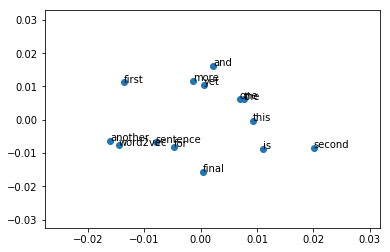

In [2]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [3]:
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


The model that we built has 14 words, and vector length of 100. Alpha is the learning rate

Alternatively, instead of training a model, I can use a trained model from Glove or other ones.

In [4]:
# Each word is represented by a vector
model.wv.vocab

{'and': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72940>,
 'another': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72898>,
 'final': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72978>,
 'first': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72748>,
 'for': <gensim.models.keyedvectors.Vocab at 0x1ea7bb727b8>,
 'is': <gensim.models.keyedvectors.Vocab at 0x1ea7bb726d8>,
 'more': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72908>,
 'one': <gensim.models.keyedvectors.Vocab at 0x1ea7bb728d0>,
 'second': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72828>,
 'sentence': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72780>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72710>,
 'this': <gensim.models.keyedvectors.Vocab at 0x1ea7bb726a0>,
 'word2vec': <gensim.models.keyedvectors.Vocab at 0x1ea7bb727f0>,
 'yet': <gensim.models.keyedvectors.Vocab at 0x1ea7bb72860>}

In [5]:
# Examine X
X.shape

(14, 100)

X is a matrix of 14 words, with a vector of 100 each

### Now the task

**First with new model**

In [6]:
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string

In [7]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [8]:
# First I make a function that generates splitted sentences (list of sentences, each sentence is a list of words), since the 
# Word2Vec model receives this for training

In the following function I am taking out the punctuation, but sometimes I will consider leaving the punctuation, since some of them, like exclamation mark, may help

In [9]:
def make_sentences_for_w2v(text):
    """ Breaks a text to a list of lists of words"""
    trantab = str.maketrans("", "", string.punctuation) # Allows later to take punctuation out
    list_broken_sents = []
    str_sentences = sent_tokenize(text) # Split to sentences
    for sent in str_sentences:
        punc_sent = sent.translate(trantab) # Takes out the punctuation
        tokenized_sent = word_tokenize(punc_sent) # Split to words
        stem_word_list = [stemmer.stem(word) for word in tokenized_sent if word not in stop] # Stemming/stopwords
        list_broken_sents.append(stem_word_list)
    return list_broken_sents

In [10]:
with open("Mr. Sweet Potatoes, and Other Stories by Anonymous.txt", 'r') as f:
    sweet_potatoes = f.read()

In [11]:
sentences_for_w2v = make_sentences_for_w2v(sweet_potatoes)
sentences_for_w2v

[['the',
  'project',
  'gutenberg',
  'ebook',
  'mr',
  'sweet',
  'potato',
  'other',
  'stori',
  'anonym',
  'this',
  'ebook',
  'use',
  'anyon',
  'anywher',
  'cost',
  'almost',
  'restrict',
  'whatsoev'],
 ['you',
  'may',
  'copi',
  'give',
  'away',
  'reus',
  'term',
  'project',
  'gutenberg',
  'licens',
  'includ',
  'ebook',
  'onlin',
  'wwwgutenbergorg',
  'titl',
  'mr',
  'sweet',
  'potato',
  'other',
  'stori',
  'author',
  'anonym',
  'releas',
  'date',
  'may',
  '26',
  '2014',
  'ebook',
  '45768',
  'languag',
  'english',
  'charact',
  'set',
  'encod',
  'iso88591',
  'start',
  'of',
  'the',
  'project',
  'gutenberg',
  'ebook',
  'mr',
  'sweet',
  'potato',
  'and',
  'other',
  'stori',
  'etext',
  'prepar',
  'charlen',
  'taylor',
  'dian',
  'monico',
  'onlin',
  'distribut',
  'proofread',
  'team',
  'httpwwwpgdpnet',
  'page',
  'imag',
  'generous',
  'made',
  'avail',
  'internet',
  'archiv',
  'httpsarchiveorg',
  'note',
  'ima

In [28]:
w2v_model = Word2Vec(sentences_for_w2v, min_count=20) # to get common words

Explore the model

In [29]:
len(w2v_model.wv.vocab)

100

In [30]:
X_vec = w2v_model.wv[w2v_model.wv.vocab] # Insted of X = w2v_model[w2v_model.wv.vocab] 

In [31]:
# X_vec

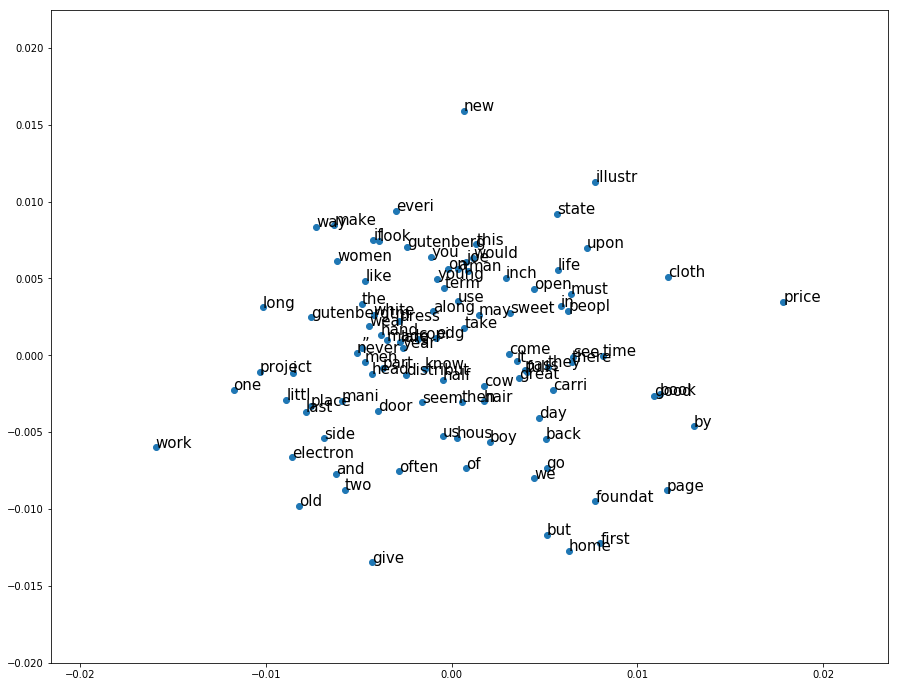

In [36]:
pca = PCA(n_components=2)
result_vec = pca.fit_transform(X_vec)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(15,12))
pyplot.scatter(result_vec[:, 0], result_vec[:, 1])
words = list(w2v_model.wv.vocab)
# Now annotating
for i, word in enumerate(words[:100]): # Limiting the amount of words to be annotated
    pyplot.annotate(word, xy=(result_vec[i, 0], result_vec[i, 1]), fontsize=15)
pyplot.show()

**Now with pretrained model (transfer learning)**

In [17]:
pretrained = Word2Vec.load(r"C:\Users\ishay\Documents\Data Science\Naya Course\part_4\02_text_mining_and_nlp\nlp_from_github\nlp_classification\data\w2v.pickle")

In [18]:
len(pretrained.wv.vocab)

122045

In [19]:
X_pre = pretrained.wv[pretrained.wv.vocab] 

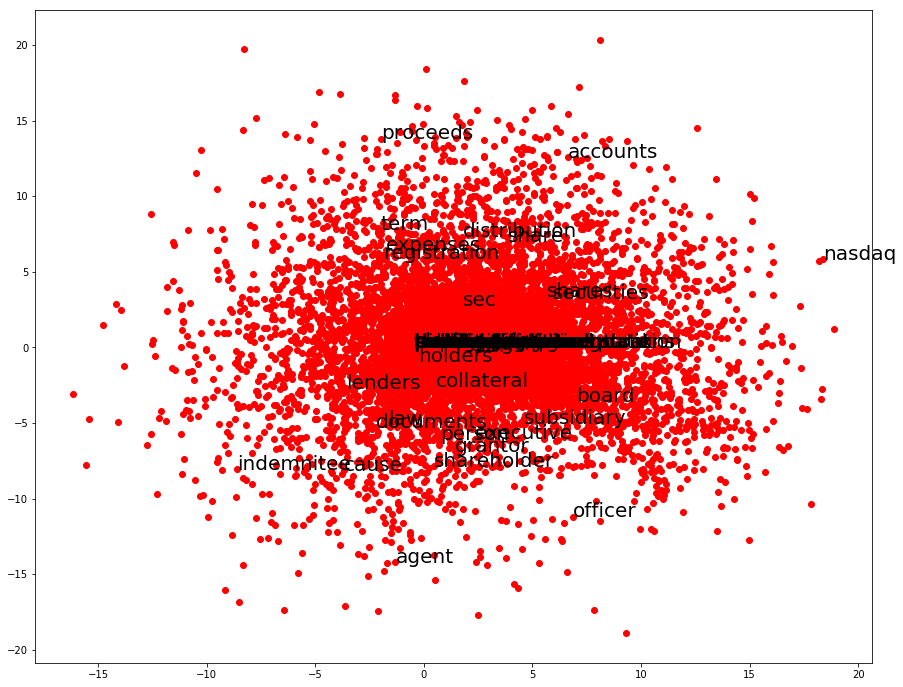

In [37]:
pca = PCA(n_components=2)
result_pre = pca.fit_transform(X_pre)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(15,12))
pyplot.scatter(result_pre[:, 0], result_pre[:, 1], color='r')
words = list(pretrained.wv.vocab)
# Now annotating
for i, word in enumerate(words[:50]): # Limiting the amount of words to be annotated
    pyplot.annotate(word, xy=(result_pre[i, 0], result_pre[i, 1]),fontsize=20)
pyplot.show()